In [99]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os
from PIL import Image


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [100]:
image_data = []
labels = []
classes = 43

for i in range(classes):
    path = os.path.join('DataSet/Train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            image_data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

image_data = np.array(image_data)
labels = np.array(labels)

## split the Data

In [ ]:
print(image_data.shape, labels.shape)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2,shuffle=True, random_state=23)

In [103]:
# OneHotEncoding for the labels
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [104]:
print(f"X_train: {X_train.shape}")
print(f"X_test:  {X_test.shape}")

print(f"y_train: { y_train.shape}")
print(f"y_test:  { y_test.shape}")

X_train: (31367, 30, 30, 3)
X_test:  (7842, 30, 30, 3)
y_train: (31367, 43)
y_test:  (7842, 43)


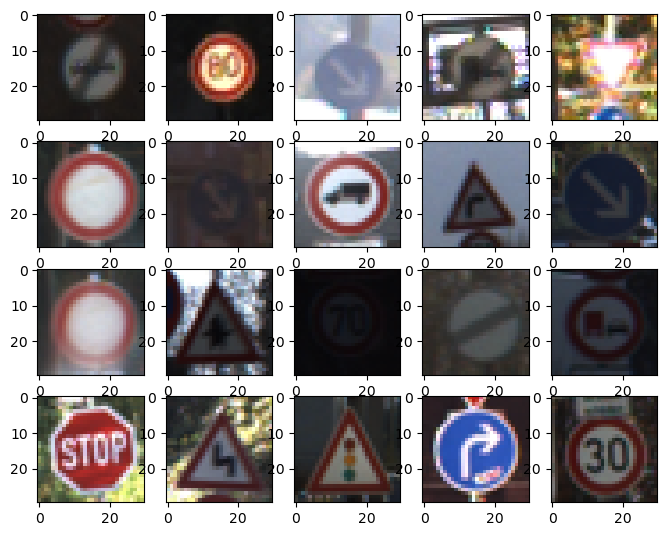

In [105]:
plt.figure(figsize=(8, 8))

for i in range(1,21):
    plt.subplot(5,5, i)
    plt.imshow(X_train[i])

plt.show()

In [106]:
model = Sequential([
    # the input layer
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:]),
    BatchNormalization(),

    # 1st hidden layer
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    # 2nd hidden layer
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    # the output layer
    Dense(43, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/Users/tariq_assan/miniconda3/envs/pydata-book/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model Summary

In [107]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 436,747 (1.67 MB)

 Trainable params: 436,235 (1.66 MB)

 Non-trainable params: 512 (2.00 KB)

In [108]:
early_stoping = EarlyStopping(
    monitor = 'val_accuracy', 
    patience = 5 )


history = model.fit(X_train, y_train, batch_size=100, 
                    epochs=30, validation_data=(X_test, y_test), 
                    callbacks=[early_stoping],verbose=1)

Epoch 1/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 28s 86ms/step - accuracy: 0.5751 - loss: 1.6589 - val_accuracy: 0.9433 - val_loss: 0.3738
Epoch 2/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.9757 - loss: 0.1133 - val_accuracy: 0.9901 - val_loss: 0.0637
Epoch 3/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.9898 - loss: 0.0488 - val_accuracy: 0.9889 - val_loss: 0.0641
Epoch 4/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - accuracy: 0.9927 - loss: 0.0309 - val_accuracy: 0.9969 - val_loss: 0.0186
Epoch 5/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.9955 - loss: 0.0218 - val_accuracy: 0.9957 - val_loss: 0.0226
Epoch 6/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.9977 - loss: 0.0137 - val_accuracy: 0.9969 - val_loss: 0.0154
Epoch 7/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - accuracy: 0.9981 - loss: 0.0105 - val_accuracy: 0.9906 - val_loss: 0.0436
Epoch 8/30
314/314 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.9972 - loss: 0.0123 

## data augmentation

In [109]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# fit the generator into the train data

datagen.fit(X_train)

# training the model using the new aubmented data

history1 = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=30,
    callbacks=[early_stoping],
    verbose=1
)

Epoch 1/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.3773 - loss: 2.5245 - val_accuracy: 0.8813 - val_loss: 0.4232
Epoch 2/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.6429 - loss: 1.0890 - val_accuracy: 0.8773 - val_loss: 0.3976
Epoch 3/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.7382 - loss: 0.7942 - val_accuracy: 0.9313 - val_loss: 0.2228
Epoch 4/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.7862 - loss: 0.6460 - val_accuracy: 0.9328 - val_loss: 0.2151
Epoch 5/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8164 - loss: 0.5467 - val_accuracy: 0.9439 - val_loss: 0.1821


In [110]:
# evaluate the model
model.evaluate(X_test, y_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9428 - loss: 0.1848


[0.18206185102462769, 0.9438918828964233]

In [111]:
y_true = pd.read_csv('DataSet/Test.csv')
image_labels = y_true['ClassId'].values
image_path = y_true['Path'].values

data = []

for img in image_path:
    image = Image.open('./DataSet/' + img)
    image = image.resize((30, 30))
    data.append(np.array(image))


X_test = np.array(data)
y_pred = np.argmax(model.predict(X_test), axis=1)


395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


In [112]:
print(f"Accuracy: {accuracy_score(image_labels, y_pred)*100:.3f}")

Accuracy: 88.211


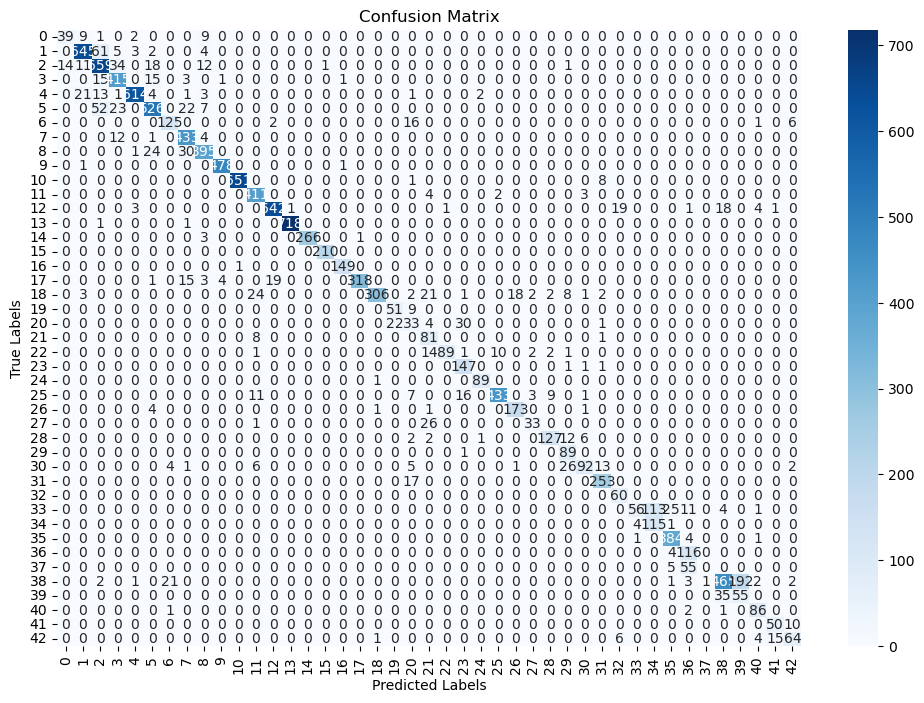

In [113]:
conf_matrix = confusion_matrix(image_labels, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [114]:
print(classification_report(image_labels, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69        60
           1       0.93      0.90      0.91       720
           2       0.82      0.88      0.85       750
           3       0.85      0.92      0.88       450
           4       0.98      0.93      0.96       660
           5       0.88      0.83      0.86       630
           6       0.83      0.83      0.83       150
           7       0.86      0.96      0.91       450
           8       0.90      0.88      0.89       450
           9       0.99      1.00      0.99       480
          10       1.00      0.99      0.99       660
          11       0.89      0.98      0.93       420
          12       0.97      0.93      0.95       690
          13       1.00      1.00      1.00       720
          14       1.00      0.99      0.99       270
          15       1.00      1.00      1.00       210
          16       0.99      0.99      0.99       150
          17       1.00    

In [115]:
history_dict = history.history

train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']


epochs = range(1, len(train_loss) + 1)

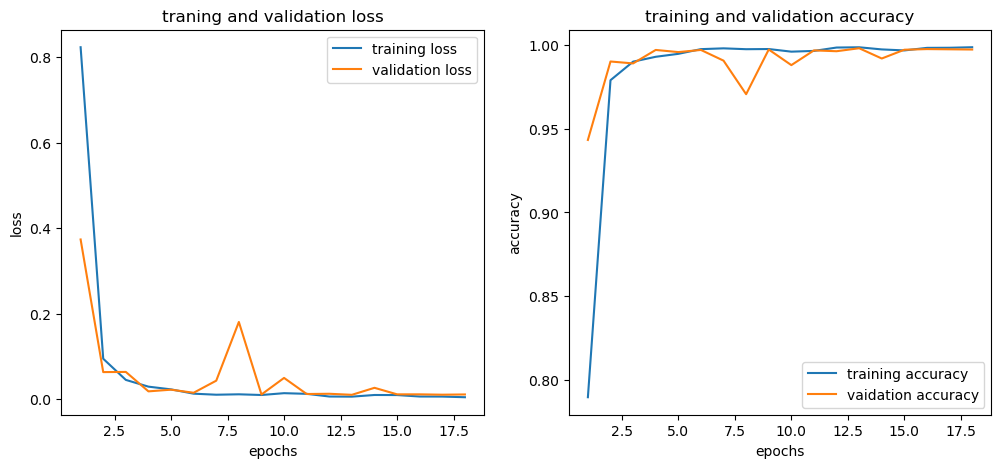

In [116]:
plt.figure(figsize=(12, 5))

# traning and validation loss values
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')

plt.title("traning and validation loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


# training and validation accuracy values
plt.subplot(1, 2, 2)

plt.plot(epochs, train_accuracy, label='training accuracy')
plt.plot(epochs, val_accuracy, label='vaidation accuracy')

plt.title('training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

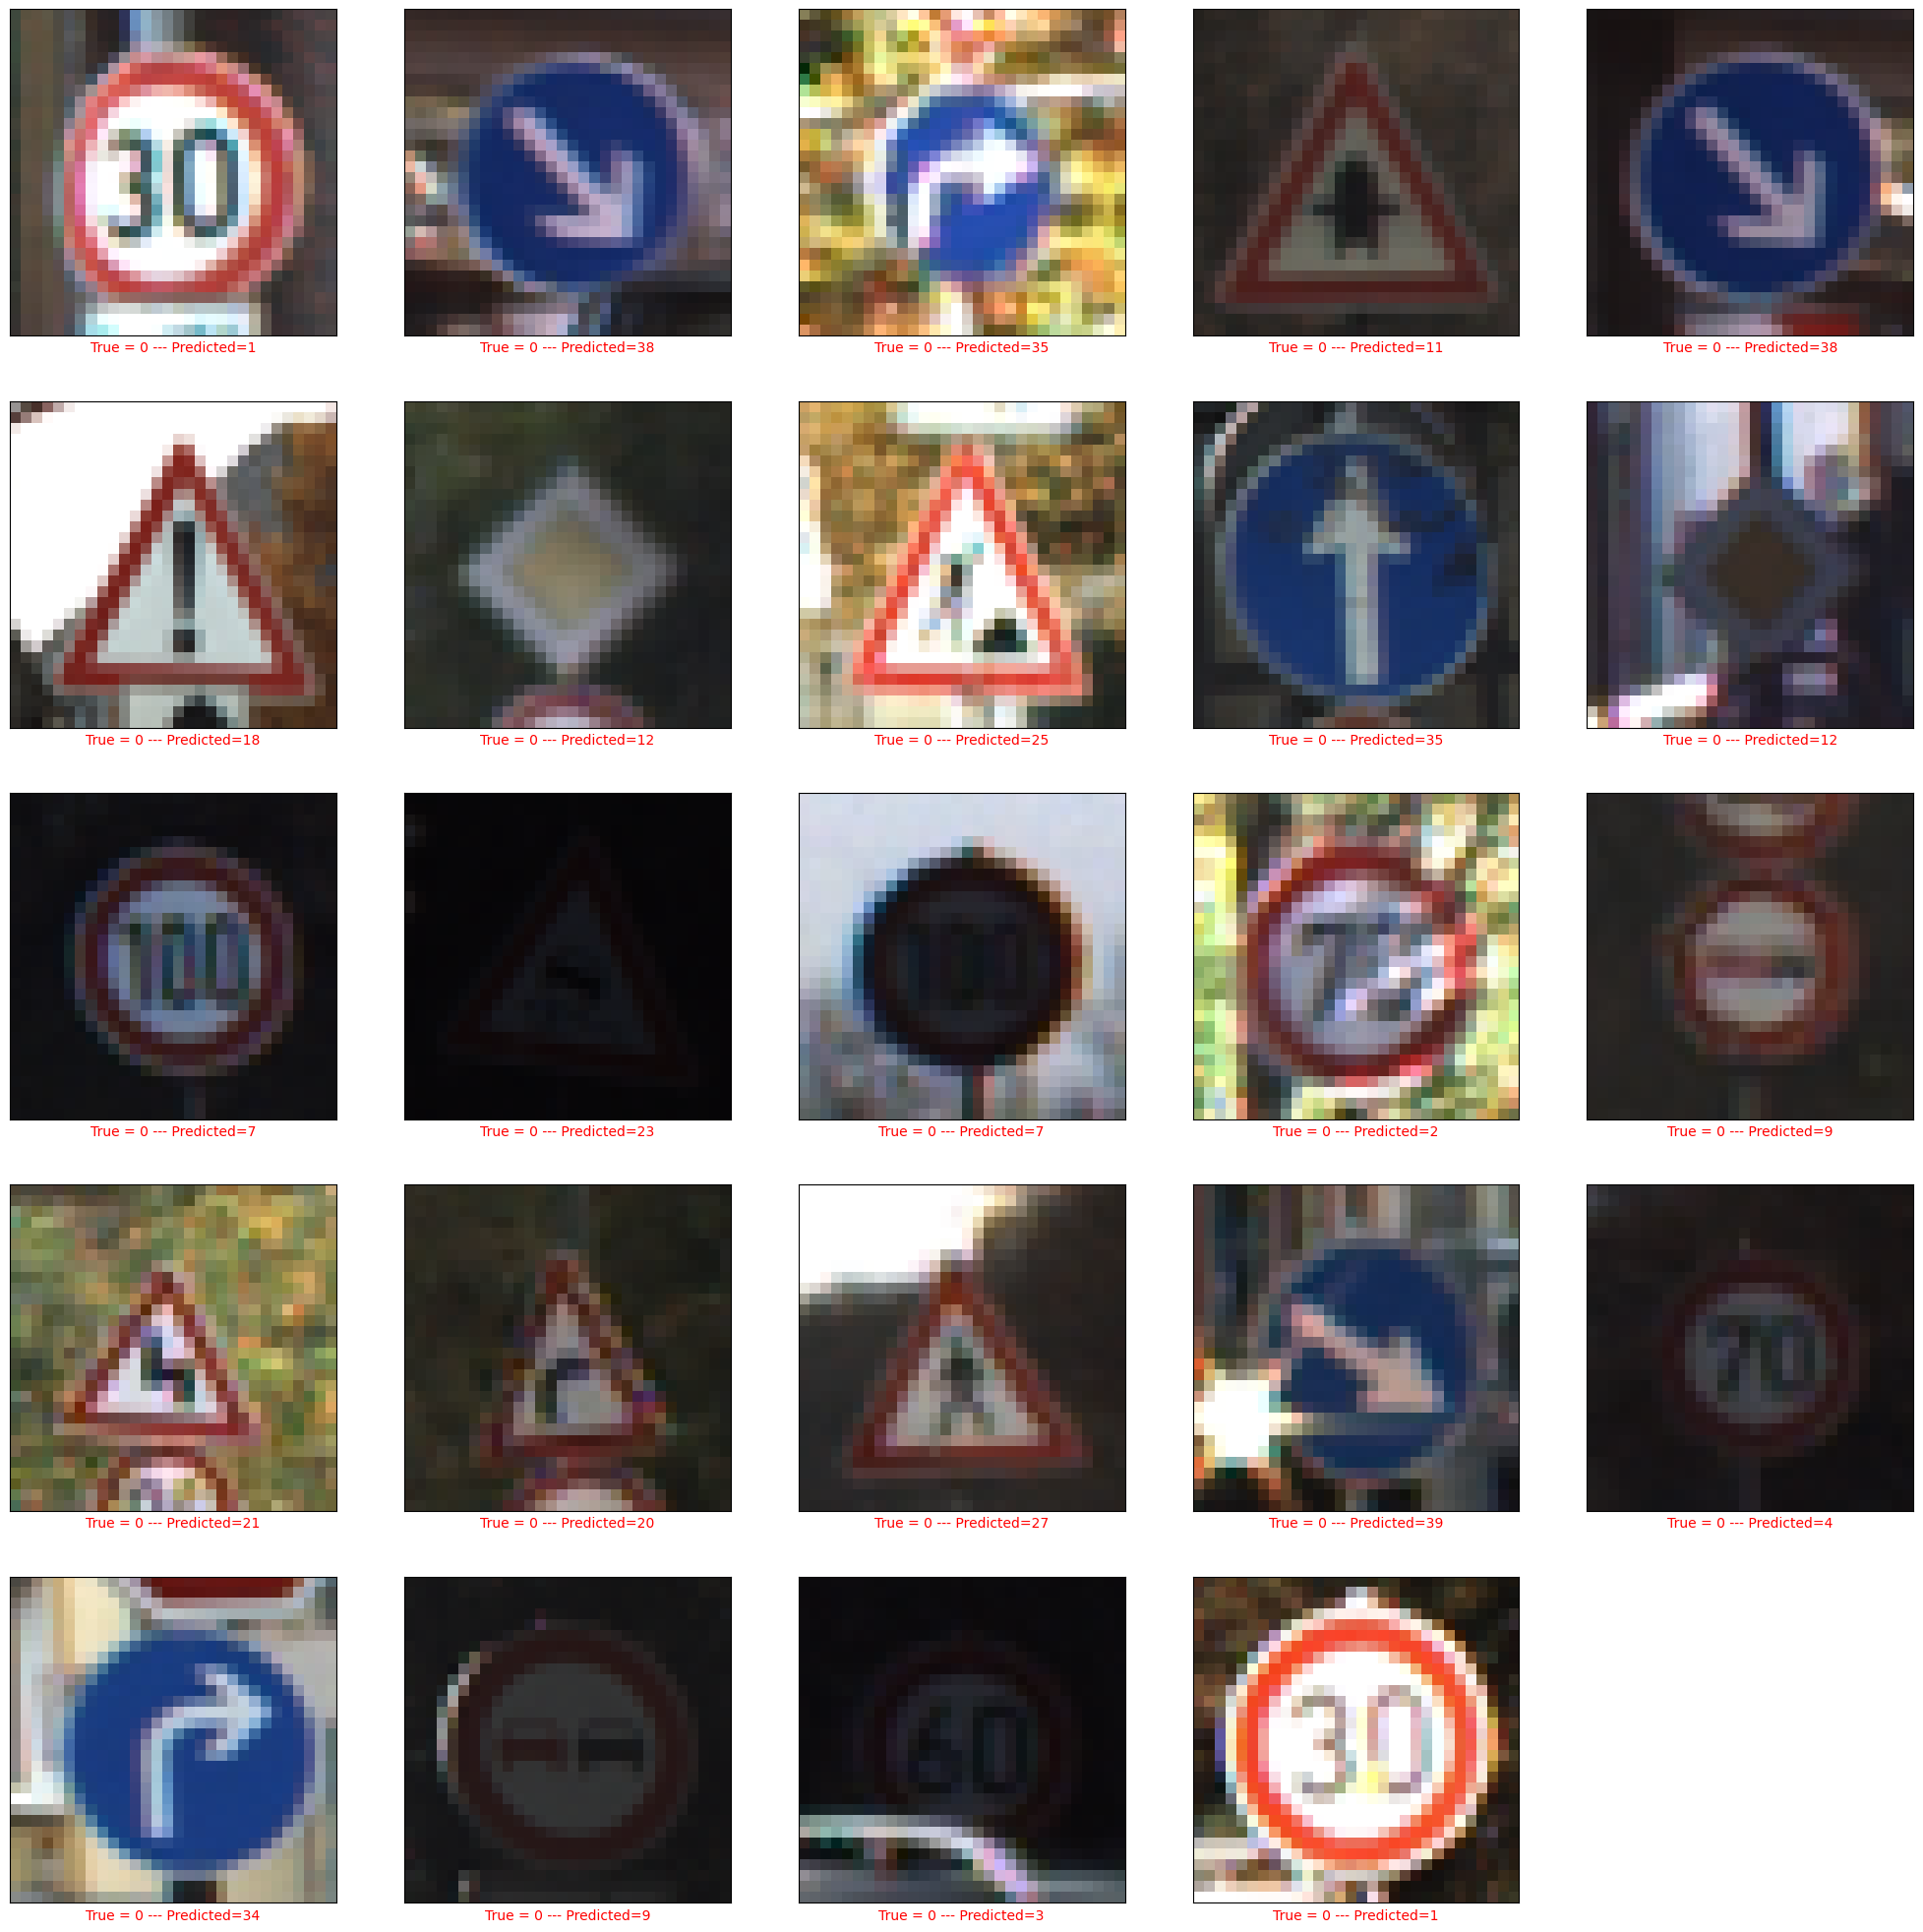

In [117]:
plt.figure(figsize=(25, 25))

start_index=0

for i in range(1, 25):
    plt.subplot(5,5, i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = y_pred[start_index + i]
    true = labels[start_index + i]
    col='g'
    if prediction != true:
        col='red'
    plt.xlabel(f"True = {true} --- Predicted={prediction}", color=col)
    plt.imshow(X_test[start_index + i])

plt.show()
